In [21]:
import torch
from torch_geometric.datasets import KarateClub
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from torch.nn import Linear
from torch_geometric.nn import GCNConv

In [22]:
dataset = KarateClub()
data = dataset[0]

In [23]:
print(dataset.num_features)

34


In [24]:
import pandas as pd
# Convert node features to Pandas Dataframe
node_features_df = pd.DataFrame(data.x.numpy() , columns=[f'feature_{i}' for i in range(data.x.shape[1])])
node_features_df['node'] = node_features_df.index
node_features_df.set_index('node' , inplace=True)

# Convert edge indices to Pandas Dataframe
edge_index_df = pd.DataFrame(data.edge_index.numpy().T, columns=['source' , 'target'])

# Convert labels to Pandas Dataframe
labels_df = pd.DataFrame(data.y.numpy() , columns=['label'])
labels_df['node'] = labels_df.index
labels_df.set_index('node' , inplace=True)


In [25]:
print(node_features_df)

      feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
node                                                                     
0           1.0        0.0        0.0        0.0        0.0        0.0   
1           0.0        1.0        0.0        0.0        0.0        0.0   
2           0.0        0.0        1.0        0.0        0.0        0.0   
3           0.0        0.0        0.0        1.0        0.0        0.0   
4           0.0        0.0        0.0        0.0        1.0        0.0   
5           0.0        0.0        0.0        0.0        0.0        1.0   
6           0.0        0.0        0.0        0.0        0.0        0.0   
7           0.0        0.0        0.0        0.0        0.0        0.0   
8           0.0        0.0        0.0        0.0        0.0        0.0   
9           0.0        0.0        0.0        0.0        0.0        0.0   
10          0.0        0.0        0.0        0.0        0.0        0.0   
11          0.0        0.0        0.0 

In [26]:
data.num_nodes 

34

In [27]:
data.edge_index.shape

torch.Size([2, 156])

In [28]:
edge_index_df.shape

(156, 2)

In [29]:
node_features_df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33
node,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
labels_df.head()

,label
node,
0,1
1,1
2,1
3,1
4,3


In [31]:
num_countries = 4

np.random.seed(42)
countries = torch.tensor(np.random.choice(num_countries, data.num_nodes))

data.y = countries

In [32]:
data

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])

In [33]:
data.edge_index

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
         33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  0,  2,
          3,  7, 13, 17, 19, 21, 30,  0,  1,  3,  7,  8,  9, 13, 27, 28, 32,  0,
          1,  2,  7, 12, 13,  0,  6, 10,  0,  6, 10, 16,  0,  4,  5, 16,  0,  1,
          2,  3,  0,  2, 30, 32, 33,  2, 33,  0,  4

In [34]:
data.y

tensor([2, 3, 0, 2, 2, 3, 0, 0, 2, 1, 2, 2, 2, 2, 3, 0, 3, 3, 3, 2, 1, 0, 1, 3,
        3, 1, 1, 1, 3, 3, 0, 0, 3, 1], dtype=torch.int32)

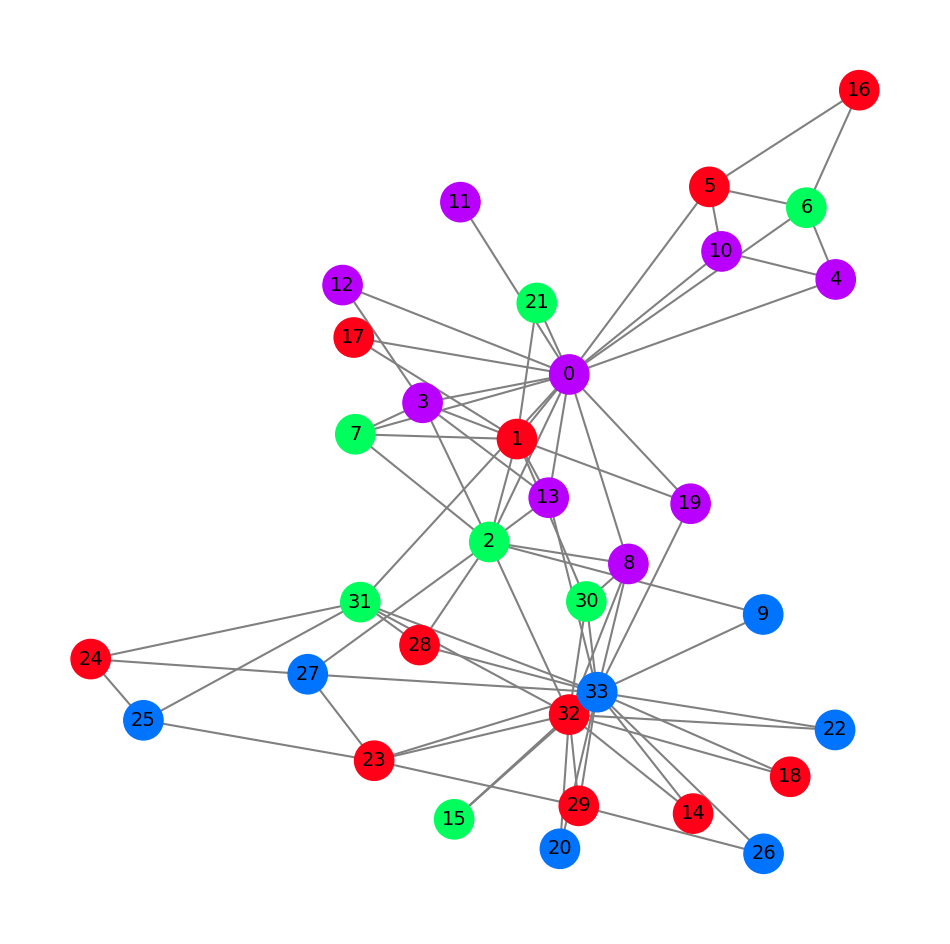

In [35]:
G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx(G,
                pos = nx.spring_layout(G, seed=0),
                with_labels = True,
                node_size=800,
                node_color= data.y,
                cmap='hsv',
                vmin=-2,
                vmax=3,
                width=1.5,
                edge_color='grey',
                font_size = 14
                )
plt.show()

In [36]:
class GCN(torch.nn.Module):
    
    def __init__(self):
        super().__init__()
        self.gcn = GCNConv(dataset.num_features, 3)
        self.out = Linear(3, num_countries)

    def forward(self,x,edge_index):
        h = self.gcn(x,edge_index).relu()
        z = self.out(h)
        return h,z

model = GCN()
print(model)        

GCN(
  (gcn): GCNConv(34, 3)
  (out): Linear(in_features=3, out_features=4, bias=True)
)


In [37]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters() , lr = 0.02)

def accuracy(pred_y ,y ):
    return (pred_y == y).sum() / len(y)

In [38]:
embeddings = []
losses = []
accuracies = []
outputs = []

for epoch in range(200):
    optimizer.zero_grad()
    h,z = model(data.x, data.edge_index)
    loss = criterion(z, data.y.long())
    acc = accuracy(z.argmax(dim=1) , data.y)
    loss.backward()
    optimizer.step()
    embeddings.append(h)
    losses.append(loss)
    accuracies.append(acc)
    outputs.append(z.argmax(dim=1))
    if epoch % 10==0:
        print(f'Epoch {epoch:>3}, Loss: {loss:.2f}, Acc: {acc*100:.3f}%')

Epoch   0, Loss: 1.39, Acc: 26.471%
Epoch  10, Loss: 1.29, Acc: 50.000%
Epoch  20, Loss: 1.16, Acc: 52.941%
Epoch  30, Loss: 0.99, Acc: 55.882%
Epoch  40, Loss: 0.82, Acc: 85.294%
Epoch  50, Loss: 0.66, Acc: 85.294%
Epoch  60, Loss: 0.52, Acc: 88.235%
Epoch  70, Loss: 0.41, Acc: 94.118%
Epoch  80, Loss: 0.32, Acc: 94.118%
Epoch  90, Loss: 0.25, Acc: 94.118%
Epoch 100, Loss: 0.21, Acc: 97.059%
Epoch 110, Loss: 0.17, Acc: 97.059%
Epoch 120, Loss: 0.14, Acc: 100.000%
Epoch 130, Loss: 0.12, Acc: 100.000%
Epoch 140, Loss: 0.10, Acc: 100.000%
Epoch 150, Loss: 0.08, Acc: 100.000%
Epoch 160, Loss: 0.07, Acc: 100.000%
Epoch 170, Loss: 0.06, Acc: 100.000%
Epoch 180, Loss: 0.05, Acc: 100.000%
Epoch 190, Loss: 0.05, Acc: 100.000%


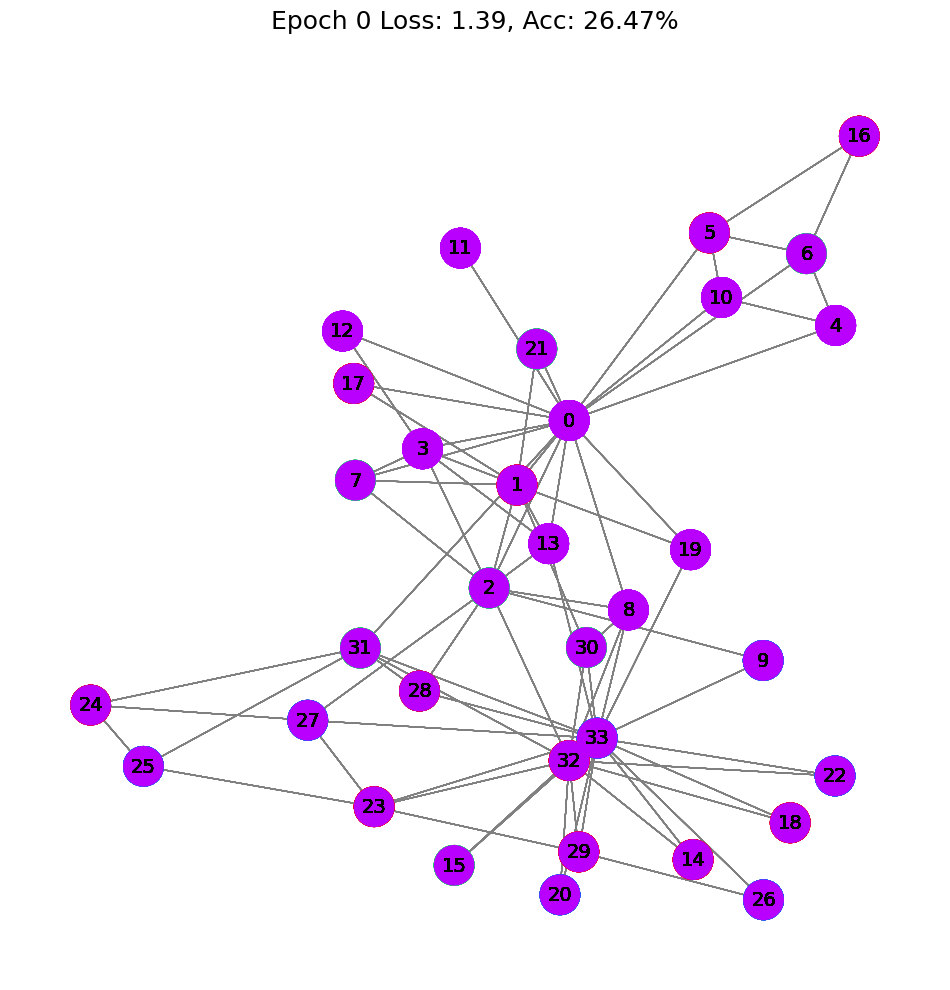

In [41]:
from IPython.display import HTML
from matplotlib import animation

plt.rcParams['animation.bitrate'] = 3000

def animate(i):

    G = to_networkx(data, to_undirected=True)
    nx.draw_networkx(G,
                     pos = nx.spring_layout(G, seed=0),
                with_labels = True,
                node_size=800,
                node_color= outputs[i].numpy(),
                cmap='hsv',
                vmin=-2,
                vmax=3,
                width=0.8,
                edge_color='grey',
                font_size = 14
                     )
    plt.title(f'Epoch {i} Loss: {losses[i].item():.2f}, Acc: {accuracies[i].item()*100:.2f}%' , 
              fontsize=18 , pad=20)
    
fig = plt.figure(figsize=(12,12))
plt.axis('off')
anim = animation.FuncAnimation(fig, animate, np.arange(0,200,10), interval=500 , repeat=True)
html = HTML(anim.to_jshtml())
display(html)
